<a href="https://colab.research.google.com/github/sakethguptha45/NHANES-Data-Analysis/blob/main/Research_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
phyical_activity_data = pd.read_csv('/content/Physical_Activity.csv')

In [ ]:
phyical_activity_data.head()

,SEQN,PAQ706,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,...,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,PAQ710,PAQ715,PAAQUEX
0,62161.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,...,2.0,NaN,NaN,2.0,NaN,NaN,300.0,3.0,3.0,1.0
1,62162.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,1.0
2,62163.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,6.0,...,2.0,NaN,NaN,2.0,NaN,NaN,720.0,2.0,3.0,2.0
3,62164.0,NaN,1.0,5.0,60.0,2.0,NaN,NaN,2.0,NaN,...,1.0,5.0,60.0,1.0,1.0,45.0,300.0,2.0,8.0,1.0
4,62165.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,7.0,...,1.0,2.0,25.0,1.0,2.0,25.0,600.0,5.0,2.0,2.0


In [ ]:
phyical_activity_data.shape

(9107, 21)

In [ ]:
phyical_activity_data.drop_duplicates(inplace=True)

In [ ]:
phyical_activity_data.shape

(9107, 21)

In [ ]:
phyical_activity_data.isnull().sum()

,0
SEQN,0
PAQ706,6807
PAQ605,2328
PAQ610,8160
PAD615,8164
PAQ620,2328
PAQ625,7042
PAD630,7048
PAQ635,2328
PAQ640,6763


In [ ]:

columns_to_drop = ['PAQ706', 'PAQ610', 'PAD615', 'PAQ625', 'PAD630', 'PAQ640', 'PAD645','PAQ655', 'PAD660', 'PAQ670', 'PAD675', 'PAD645','PAAQUEX','PAQ710','PAQ715','PAQ706']
# I'm removing the columns with more than 70% missing values in that column, there is little information we will be getting form that data.

phyical_activity_data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
phyical_activity_data.shape

(9107, 7)

In [ ]:
phyical_activity_data.isnull().sum()

,0
SEQN,0
PAQ605,2328
PAQ620,2328
PAQ635,2328
PAQ650,2328
PAQ665,2328
PAD680,2334


In [ ]:
mask_605 = phyical_activity_data['PAQ605'].isnull()



In [ ]:
mask_605

,PAQ605
0,False
1,True
2,False
3,False
4,False
...,...
9102,False
9103,False
9104,True
9105,False


In [ ]:
mask_620 = phyical_activity_data['PAQ620'].isnull()

# Check if both masks are identical
print((mask_605 == mask_620).all())

True


In [ ]:

mask_620 = phyical_activity_data['PAQ620'].isnull()


mask_635 = phyical_activity_data['PAQ635'].isnull()

# Check if both masks are identical
print((mask_635 == mask_620).all())

True


In [ ]:


mask_635 = phyical_activity_data['PAQ635'].isnull()

mask_650 = phyical_activity_data['PAQ650'].isnull()


# Check if both masks are identical
print((mask_635 == mask_650).all())

True


In [ ]:

mask_650 = phyical_activity_data['PAQ650'].isnull()

mask_665 = phyical_activity_data['PAQ665'].isnull()

# Check if both masks are identical
print((mask_665 == mask_650).all())

True


In [ ]:

mask_665 = phyical_activity_data['PAQ665'].isnull()

mask_680 = phyical_activity_data['PAD680'].isnull()


# Check if both masks are identical
print((mask_665 == mask_680).all())

False


In [ ]:
cols_to_check = ['PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665']

# Drop rows that have NaN in any of these columns
data_cleaned = phyical_activity_data.dropna(subset=cols_to_check)

In [ ]:
data_cleaned.shape

(6779, 7)

In [ ]:
data_cleaned.isnull().sum()

,0
SEQN,0
PAQ605,0
PAQ620,0
PAQ635,0
PAQ650,0
PAQ665,0
PAD680,6


In [ ]:
day_data = pd.read_csv('/content/PAXDAY_G.csv')

In [ ]:
day_data.shape

(61168, 15)

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61168 entries, 0 to 61167
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      61168 non-null  float64
 1   PAXDAYD   61168 non-null  int64  
 2   PAXDAYWD  61168 non-null  int64  
 3   PAXSSNDP  61168 non-null  float64
 4   PAXMSTD   61168 non-null  object 
 5   PAXTMD    61168 non-null  float64
 6   PAXAISMD  61168 non-null  float64
 7   PAXVMD    61168 non-null  float64
 8   PAXMTSD   61168 non-null  float64
 9   PAXWWMD   61168 non-null  float64
 10  PAXSWMD   61168 non-null  float64
 11  PAXNWMD   61168 non-null  float64
 12  PAXUMD    61168 non-null  float64
 13  PAXLXSD   61168 non-null  float64
 14  PAXQFD    61168 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 7.0+ MB


In [ ]:
day_data.describe(include='all')

,SEQN,PAXDAYD,PAXDAYWD,PAXSSNDP,PAXMSTD,PAXTMD,PAXAISMD,PAXVMD,PAXMTSD,PAXWWMD,PAXSWMD,PAXNWMD,PAXUMD,PAXLXSD,PAXQFD
count,61168.000000,61168.000000,61168.000000,6.116800e+04,61168,61168.000000,6.116800e+04,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,61168.000000,6.116800e+04,61168.000000
unique,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,0:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,54251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,67020.577393,4.962137,3.901860,2.339339e+07,NaN,1277.250458,2.849805e+06,1275.465897,11367.280024,703.114177,383.338903,144.729287,44.283531,1.266445e+05,2.060620
std,2810.231500,2.578416,2.058585,1.710567e+07,NaN,333.717026,1.288327e+06,334.558732,6843.649392,340.368957,213.182394,328.499549,26.949677,1.653127e+05,39.183591
min,62161.000000,1.000000,1.000000,0.000000e+00,NaN,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,64596.000000,3.000000,2.000000,8.784000e+06,NaN,1440.000000,2.271900e+06,1434.000000,6261.295750,487.000000,277.000000,0.000000,26.000000,1.473169e+04,0.000000
50%,67024.000000,5.000000,4.000000,2.260800e+07,NaN,1440.000000,2.771784e+06,1440.000000,11678.754500,846.000000,418.000000,0.000000,42.000000,6.953508e+04,0.000000
75%,69437.000000,7.000000,6.000000,3.787200e+07,NaN,1440.000000,3.373374e+06,1440.000000,16100.184500,953.000000,510.000000,10.000000,60.000000,1.740390e+05,0.000000


In [ ]:
day_data.isnull().sum()

,0
SEQN,0
PAXDAYD,0
PAXDAYWD,0
PAXSSNDP,0
PAXMSTD,0
PAXTMD,0
PAXAISMD,0
PAXVMD,0
PAXMTSD,0
PAXWWMD,0


In [ ]:
day_data.columns

Index(['SEQN', 'PAXDAYD', 'PAXDAYWD', 'PAXSSNDP', 'PAXMSTD', 'PAXTMD',
       'PAXAISMD', 'PAXVMD', 'PAXMTSD', 'PAXWWMD', 'PAXSWMD', 'PAXNWMD',
       'PAXUMD', 'PAXLXSD', 'PAXQFD'],
      dtype='object')

In [ ]:
day_data.shape

(61168, 15)

In [ ]:
day_data = day_data.drop(columns = ['PAXDAYD','PAXDAYWD','PAXSSNDP','PAXMSTD','PAXTMD','PAXQFD'] )



In [ ]:
day_data.shape

(61168, 9)

In [ ]:
day_data.head()

,SEQN,PAXAISMD,PAXVMD,PAXMTSD,PAXWWMD,PAXSWMD,PAXNWMD,PAXUMD,PAXLXSD
0,62161.0,1426946.0,690.0,4636.399,508.0,139.0,0.0,43.0,49185.11
1,62161.0,3123802.0,1440.0,12531.363,816.0,548.0,0.0,76.0,433309.24
2,62161.0,2779464.0,1440.0,14013.228,921.0,462.0,0.0,57.0,475977.11
3,62161.0,2724602.0,1440.0,16982.386,911.0,472.0,0.0,57.0,208827.73
4,62161.0,3144826.0,1440.0,11718.500,854.0,504.0,0.0,82.0,114269.65


In [ ]:
day_data = day_data.groupby('SEQN', as_index=False)[
    ['PAXAISMD', 'PAXVMD', 'PAXMTSD', 'PAXWWMD', 'PAXSWMD', 'PAXNWMD', 'PAXUMD', 'PAXLXSD']
].std()

# Rename columns to reflect averages (optional)

day_data.columns = [
    'SEQN', 'std_PAXAISMD', 'std_PAXVMD', 'std_PAXMTSD', 'std_PAXWWMD',
    'std_PAXSWMD', 'std_PAXNWMD', 'std_PAXUMD', 'std_PAXLXSD'
]


In [ ]:
day_data.shape

(6917, 9)

In [ ]:
day_data.columns

Index(['SEQN', 'std_PAXAISMD', 'std_PAXVMD', 'std_PAXMTSD', 'std_PAXWWMD',
       'std_PAXSWMD', 'std_PAXNWMD', 'std_PAXUMD', 'std_PAXLXSD'],
      dtype='object')

In [ ]:
day_data.isnull().sum()

,0
SEQN,0
std_PAXAISMD,10
std_PAXVMD,10
std_PAXMTSD,10
std_PAXWWMD,10
std_PAXSWMD,10
std_PAXNWMD,10
std_PAXUMD,10
std_PAXLXSD,10


In [ ]:
cols = ['std_PAXAISMD', 'std_PAXVMD', 'std_PAXMTSD', 'std_PAXWWMD',
        'std_PAXSWMD', 'std_PAXNWMD', 'std_PAXUMD', 'std_PAXLXSD']

# Fill NaN values in these columns with the column mean
day_data[cols] = day_data[cols].fillna(day_data[cols].mean())


In [ ]:
day_data.isnull().sum()

,0
SEQN,0
std_PAXAISMD,0
std_PAXVMD,0
std_PAXMTSD,0
std_PAXWWMD,0
std_PAXSWMD,0
std_PAXNWMD,0
std_PAXUMD,0
std_PAXLXSD,0


In [ ]:
demo_data = pd.read_csv('/content/demo.csv')

In [ ]:
demo_data.shape

(9756, 48)

In [ ]:
demo_data.describe(include='all')

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGY,...,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU
count,9756.000000,9756.0,9756.000000,9756.000000,9756.000000,626.000000,9756.000000,9756.000000,9338.000000,3418.000000,...,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9756.000000,9391.000000,9394.000000,9620.000000,4875.000000
mean,67038.500000,7.0,1.957155,1.502255,31.402624,10.030351,3.229090,3.439832,1.516278,9.641311,...,3.590713,0.530955,0.931837,0.395039,1.495695,45.390631,1.430199,3.436555,3.190541,3.608410
std,2816.458947,0.0,0.202519,0.500021,24.578990,7.015460,1.254126,1.601565,0.499762,5.180846,...,1.769168,0.796562,1.124977,0.698502,0.500007,15.867927,3.058499,1.328615,7.620507,1.369509
min,62161.000000,7.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000
25%,64599.750000,7.0,2.000000,1.000000,9.000000,4.000000,3.000000,3.000000,1.000000,5.000000,...,2.000000,0.000000,0.000000,0.000000,1.000000,33.000000,1.000000,2.000000,1.000000,3.000000
50%,67038.500000,7.0,2.000000,2.000000,26.000000,9.000000,3.000000,3.000000,2.000000,9.000000,...,4.000000,0.000000,1.000000,0.000000,1.000000,43.000000,1.000000,4.000000,1.000000,4.000000
75%,69477.250000,7.0,2.000000,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,14.000000,...,5.000000,1.000000,2.000000,1.000000,2.000000,56.000000,2.000000,4.000000,5.000000,5.000000
max,71916.000000,7.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,20.000000,...,7.000000,3.000000,4.000000,3.000000,2.000000,80.000000,99.000000,9.000000,99.000000,9.000000


In [ ]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9756 non-null   float64
 1   SDDSRVYR  9756 non-null   float64
 2   RIDSTATR  9756 non-null   float64
 3   RIAGENDR  9756 non-null   float64
 4   RIDAGEYR  9756 non-null   float64
 5   RIDAGEMN  626 non-null    float64
 6   RIDRETH1  9756 non-null   float64
 7   RIDRETH3  9756 non-null   float64
 8   RIDEXMON  9338 non-null   float64
 9   RIDEXAGY  3418 non-null   float64
 10  RIDEXAGM  4009 non-null   float64
 11  DMQMILIZ  6007 non-null   float64
 12  DMQADFC   551 non-null    float64
 13  DMDBORN4  9756 non-null   float64
 14  DMDCITZN  9751 non-null   float64
 15  DMDYRSUS  2073 non-null   float64
 16  DMDEDUC3  2599 non-null   float64
 17  DMDEDUC2  5560 non-null   float64
 18  DMDMARTL  5560 non-null   float64
 19  RIDEXPRG  1208 non-null   float64
 20  SIALANG   9756 non-null   floa

In [ ]:
demo_data.isnull().sum()

,0
SEQN,0
SDDSRVYR,0
RIDSTATR,0
RIAGENDR,0
RIDAGEYR,0
RIDAGEMN,9130
RIDRETH1,0
RIDRETH3,0
RIDEXMON,418
RIDEXAGY,6338


In [ ]:
columns_to_drop = [

    'RIDAGEMN',  # Age in months (only for infants, we use RIDAGEYR instead)
    'RIDRETH3',  # Alternative version of race/ethnicity (keeping RIDRETH1)

    'DMDHHSZA',  # Number of children under 5
    'DMDHHSZB',  # Number of children aged 6-17
    'DMDHHSZE',  # Number of adults aged 60+

    'DMDHRMAR',  # Marital status (not directly impacting activity/sleep)
    'DMQMILIZ',  # Military service
    'DMQADFC',  # Served in a foreign country
    'DMDCITZN',  # Citizenship status (we keep DMDBORN4 instead)

    'RIDSTATR',  # Interview/Exam status
    'SIALANG',  # Interview language
    'SIAPROXY',  # Proxy respondent used
    'SIAINTRP',  # Interpreter used

    'DMDHRGND',  # Gender of household reference person
    'DMDHREDZ',  # Education level of reference person (duplicate of DMDHREDU)

    'DMDFMSIZ',  # Total number in the family (we are keeping DMDHHSIZ instead)
    'INDHHINC',  # Alternative income measure (keeping INDHHIN2 instead)
    'INDFMINC',  # Alternative income measure (keeping INDFMPIR instead)

    'INDFMPIR2',
    'INDFMIN2',

    'DMDHRAGE', 'DMDEDUC3', 'DMDEDUC2', 'DMQADFC', 'DMDHRYRS',
    'DMDHHRSD', 'DMDHHRRD', 'DMDHRDYS', 'DMDHHRSD', 'DMDHHRSE',
    'DMDBRTHD', 'DMDBRTHM', 'DMDBRTHY', 'DMDBORN', 'DMDYRSUS',
    'DMDIMARM', 'DMDHRRES', 'DMDHHRRP'
]


In [ ]:
demo_data = demo_data.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
demo_data.shape

(9756, 28)

In [ ]:
demo_data = demo_data.drop(columns = ['SDDSRVYR','RIDRETH1','RIDEXMON','RIDEXMON','RIDEXAGM','DMDMARTL','DMDMARTL','FIALANG',
       'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
       'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA','DMDHRBR4','DMDHSEDU','RIDEXAGY','RIDEXPRG','INDFMPIR'], errors ='ignore' )

In [ ]:
demo_data.shape

(9756, 7)

In [ ]:
demo_data.isnull().sum()

,0
SEQN,0
RIAGENDR,0
RIDAGEYR,0
DMDBORN4,0
INDHHIN2,81
DMDHHSIZ,0
DMDHREDU,362


In [ ]:
# For INDHHIN2: Replace 77, 99, and missing values with 16
demo_data['INDHHIN2'] = pd.to_numeric(demo_data['INDHHIN2'], errors='coerce')
demo_data['INDHHIN2'] = demo_data['INDHHIN2'].replace([77, 99], 16)
demo_data['INDHHIN2'] = demo_data['INDHHIN2'].fillna(16)



# For DMDHREDU: Replace 7, 8, 9, and missing values with 6
demo_data['DMDHREDU'] = pd.to_numeric(demo_data['DMDHREDU'], errors='coerce')
demo_data['DMDHREDU'] = demo_data['DMDHREDU'].replace([7, 8, 9], 6)
demo_data['DMDHREDU'] = demo_data['DMDHREDU'].fillna(6)


In [ ]:
demo_data.isnull().sum()

,0
SEQN,0
RIAGENDR,0
RIDAGEYR,0
DMDBORN4,0
INDHHIN2,0
DMDHHSIZ,0
DMDHREDU,0


In [ ]:
phyical_activity_data.shape

(9107, 7)

In [ ]:
phyical_activity_data.isnull().sum()

,0
SEQN,0
PAQ605,2328
PAQ620,2328
PAQ635,2328
PAQ650,2328
PAQ665,2328
PAD680,2334


In [ ]:
day_data.shape

(6917, 9)

In [ ]:
demo_data.shape

(9756, 7)

In [ ]:
# Merge physical_activity_data and day_data based on SEQN
merged_data = day_data.merge(phyical_activity_data, on='SEQN', how='inner')


In [ ]:
merged_data.shape

(6917, 15)

In [ ]:
merged_data.isnull().sum()

,0
SEQN,0
std_PAXAISMD,0
std_PAXVMD,0
std_PAXMTSD,0
std_PAXWWMD,0
std_PAXSWMD,0
std_PAXNWMD,0
std_PAXUMD,0
std_PAXLXSD,0
PAQ605,1166


In [ ]:
# Merge the resulting DataFrame with demo_data
merged_data = merged_data.merge(demo_data, on='SEQN', how='inner')

In [ ]:
merged_data.shape

(6917, 21)

In [ ]:
merged_data.isnull().sum()

,0
SEQN,0
std_PAXAISMD,0
std_PAXVMD,0
std_PAXMTSD,0
std_PAXWWMD,0
std_PAXSWMD,0
std_PAXNWMD,0
std_PAXUMD,0
std_PAXLXSD,0
PAQ605,1166


In [ ]:
# The number of matching records is the number of unique SEQN in the merged DataFrame
print("Number of matching SEQN across all three datasets:", merged_data['SEQN'].nunique())

Number of matching SEQN across all three datasets: 6917


In [ ]:
#combined_data_cleaned = combined_data.dropna(subset=['col1', 'col2'])


In [ ]:
merged_data.shape

(6917, 21)

In [ ]:
merged_data.isnull().sum()

,0
SEQN,0
std_PAXAISMD,0
std_PAXVMD,0
std_PAXMTSD,0
std_PAXWWMD,0
std_PAXSWMD,0
std_PAXNWMD,0
std_PAXUMD,0
std_PAXLXSD,0
PAQ605,1166


In [ ]:
# Create boolean masks indicating where the values are null
mask_605 = merged_data['PAQ605'].isnull()
mask_620 = merged_data['PAQ620'].isnull()
mask_635 = merged_data['PAQ635'].isnull()
mask_650 = merged_data['PAQ650'].isnull()
mask_665 = merged_data['PAQ665'].isnull()

# Compare masks between each pair to see if null positions match
print("PAQ605 equals PAQ620:", (mask_605 == mask_620).all())
print("PAQ620 equals PAQ635:", (mask_620 == mask_635).all())
print("PAQ635 equals PAQ650:", (mask_635 == mask_650).all())
print("PAQ650 equals PAQ665:", (mask_650 == mask_665).all())


PAQ605 equals PAQ620: True
PAQ620 equals PAQ635: True
PAQ635 equals PAQ650: True
PAQ650 equals PAQ665: True


In [ ]:
mask_PAD680 = merged_data['PAD680'].isnull()
print("PAQ605 equals PAD680:", (mask_605 == mask_PAD680).all())


PAQ605 equals PAD680: False


In [ ]:
merged_data['PAD680'].isnull().sum()

1172

In [ ]:
# Check rows where all specified columns are null simultaneously
combined_null_mask = merged_data[['PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665']].isnull().all(axis=1)
print("Number of rows where PAQ605, PAQ620, PAQ635, PAQ650, and PAQ665 are all null:",
      combined_null_mask.sum())


Number of rows where PAQ605, PAQ620, PAQ635, PAQ650, and PAQ665 are all null: 1166


In [ ]:
cols_to_check = ['PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665']
data_cleaned = merged_data.dropna(subset=cols_to_check)


In [ ]:
merged_data.shape

(6917, 21)

In [ ]:
data_cleaned.shape

(5751, 21)

In [ ]:
data_cleaned.isnull().sum()

,0
SEQN,0
std_PAXAISMD,0
std_PAXVMD,0
std_PAXMTSD,0
std_PAXWWMD,0
std_PAXSWMD,0
std_PAXNWMD,0
std_PAXUMD,0
std_PAXLXSD,0
PAQ605,0


# **EXPLOTATORY DATA ANALYSIS:**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

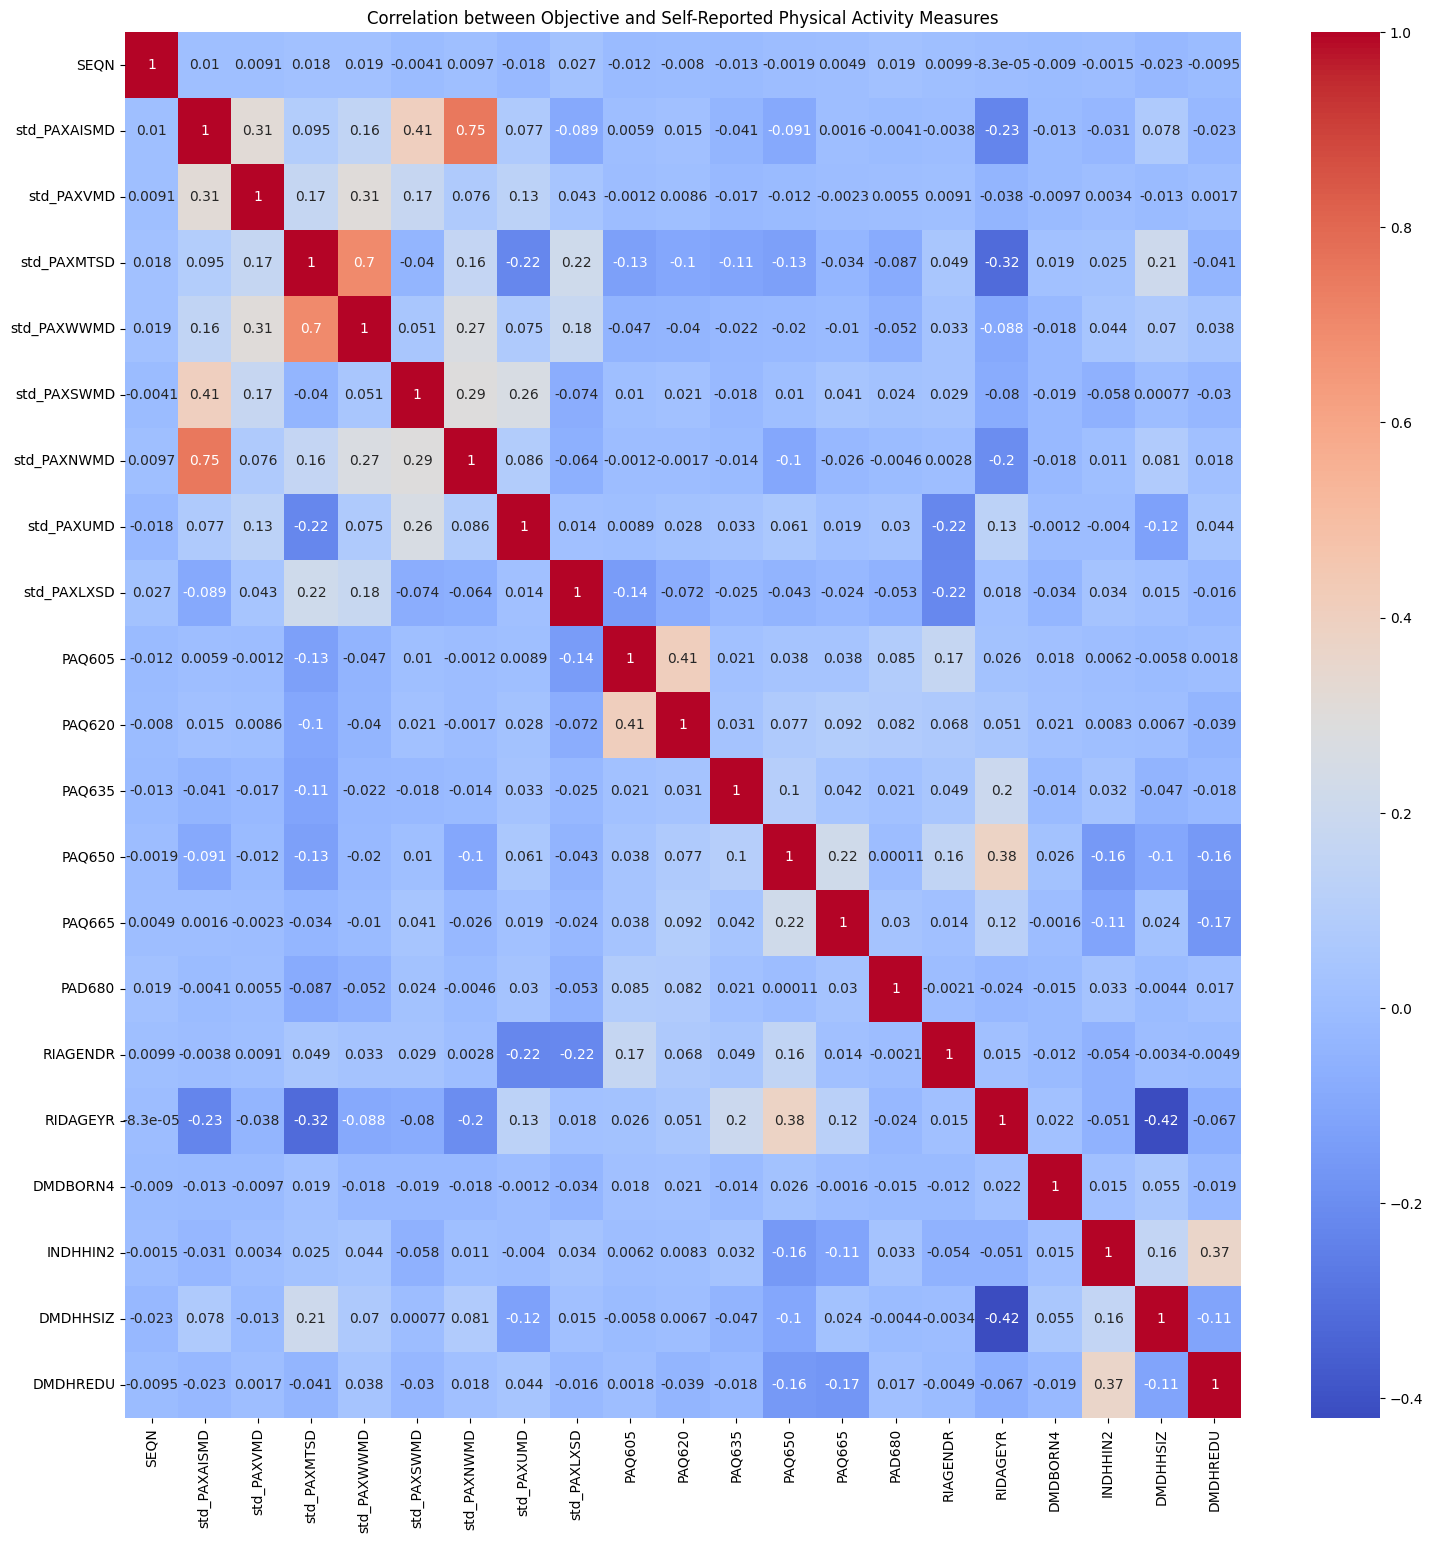

In [ ]:
# Define a subset of relevant columns (adjust based on your research focus)
corr_matrix = data_cleaned.corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Objective and Self-Reported Physical Activity Measures')
plt.show()


In [ ]:
data_cleaned.dtypes

,0
SEQN,float64
std_PAXAISMD,float64
std_PAXVMD,float64
std_PAXMTSD,float64
std_PAXWWMD,float64
std_PAXSWMD,float64
std_PAXNWMD,float64
std_PAXUMD,float64
std_PAXLXSD,float64
PAQ605,float64


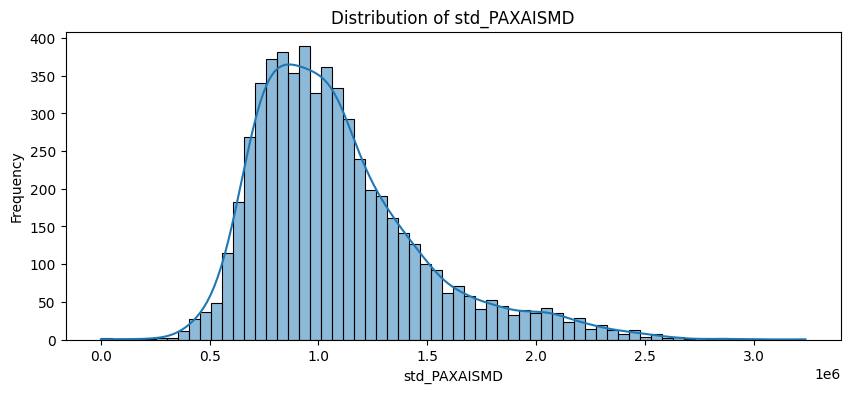

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(data_cleaned['std_PAXAISMD'], kde=True)
plt.title('Distribution of std_PAXAISMD')
plt.xlabel('std_PAXAISMD')
plt.ylabel('Frequency')
plt.show()

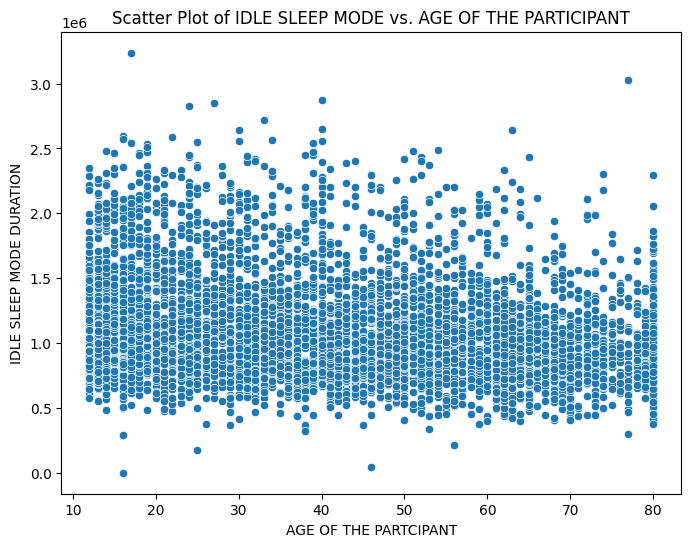

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RIDAGEYR', y='std_PAXAISMD', data=data_cleaned)
plt.title('Scatter Plot of IDLE SLEEP MODE vs. AGE OF THE PARTICIPANT')
plt.xlabel('AGE OF THE PARTCIPANT')
plt.ylabel('IDLE SLEEP MODE DURATION')
plt.show()


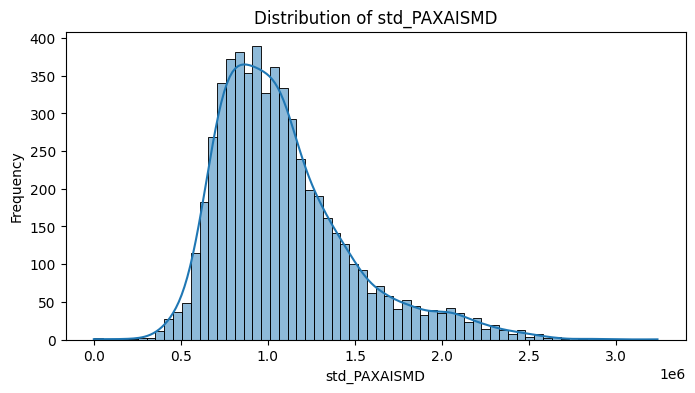

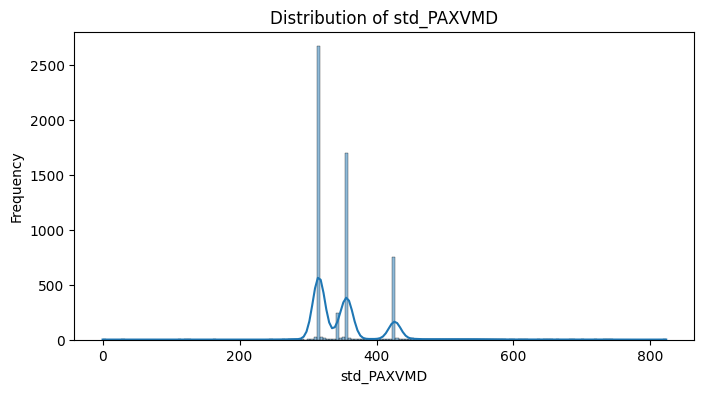

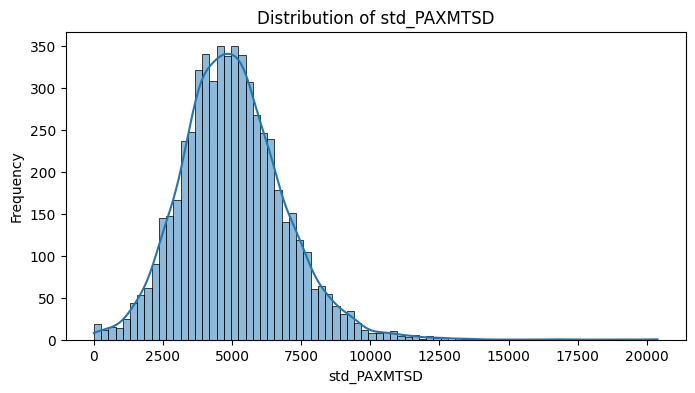

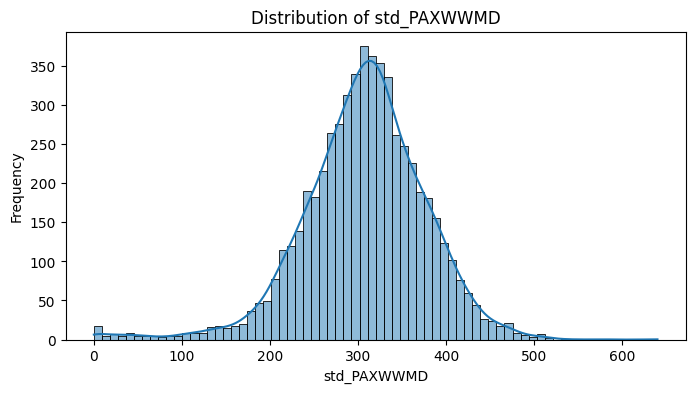

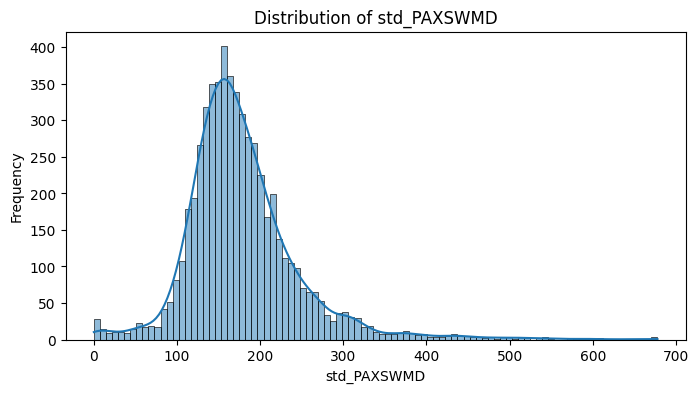

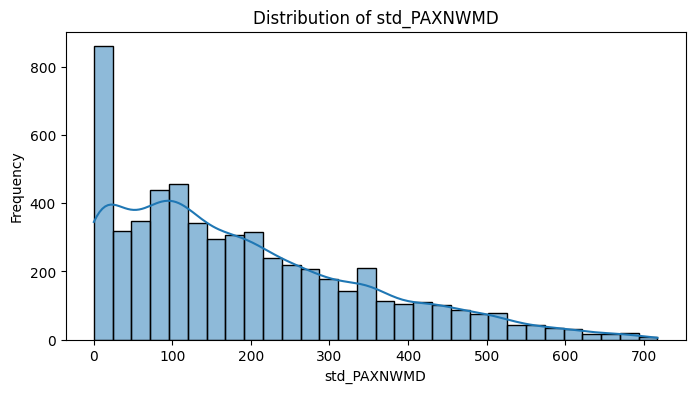

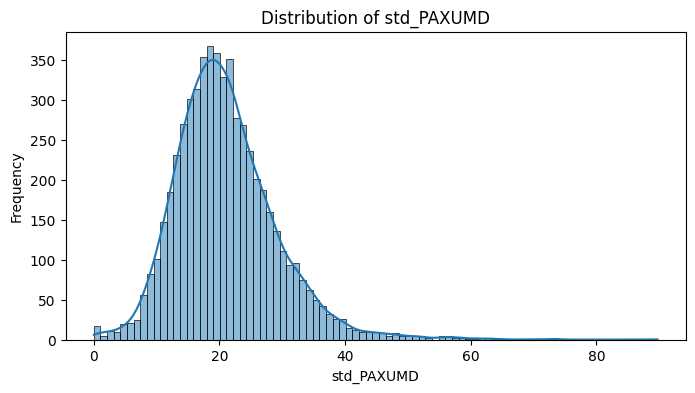

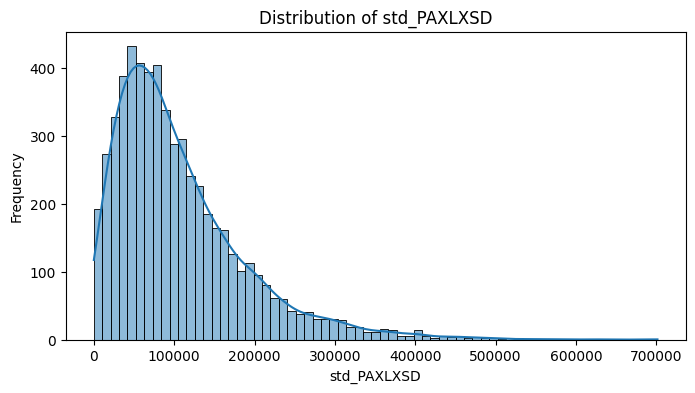

In [ ]:


cols_std = ['std_PAXAISMD', 'std_PAXVMD', 'std_PAXMTSD', 'std_PAXWWMD',
            'std_PAXSWMD', 'std_PAXNWMD', 'std_PAXUMD', 'std_PAXLXSD']

for col in cols_std:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


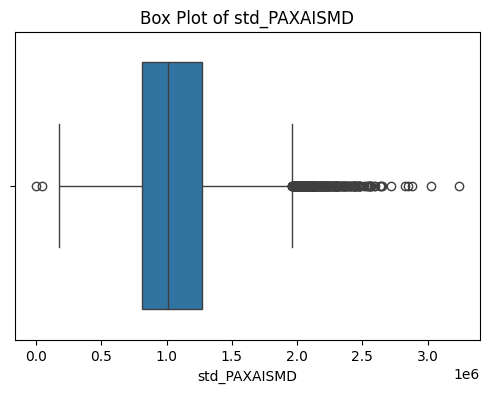

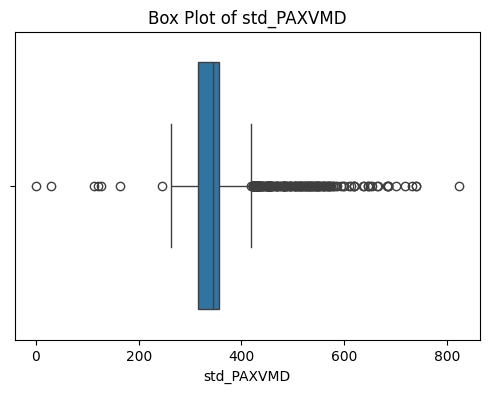

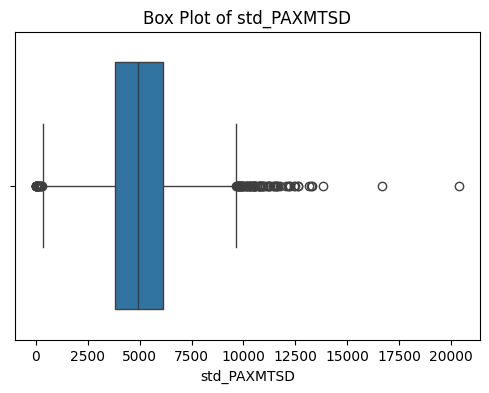

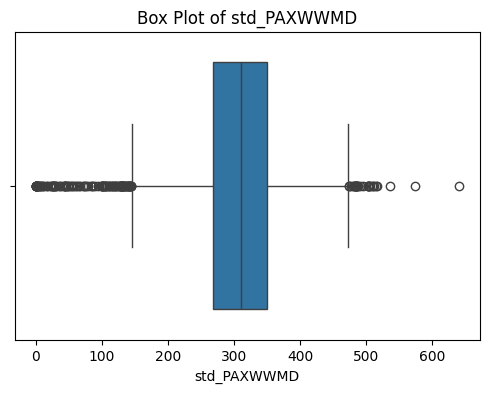

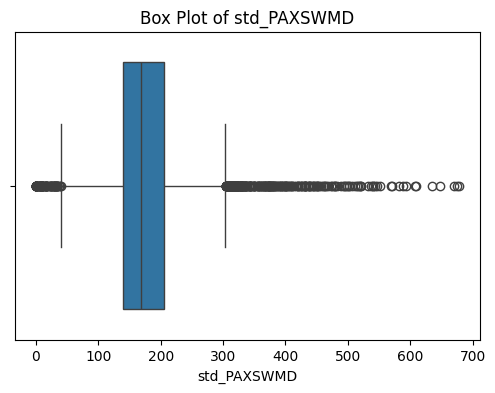

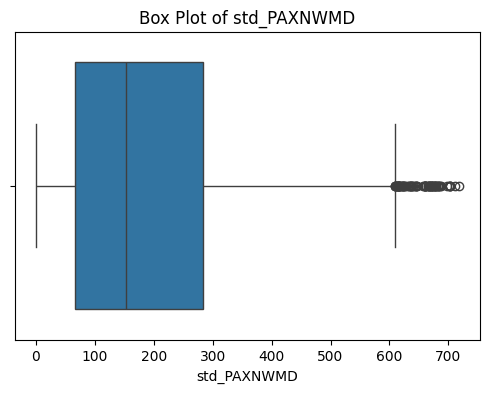

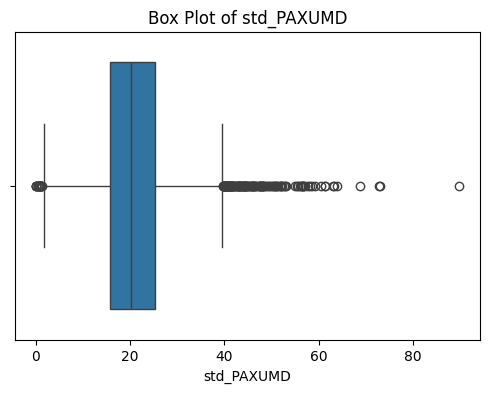

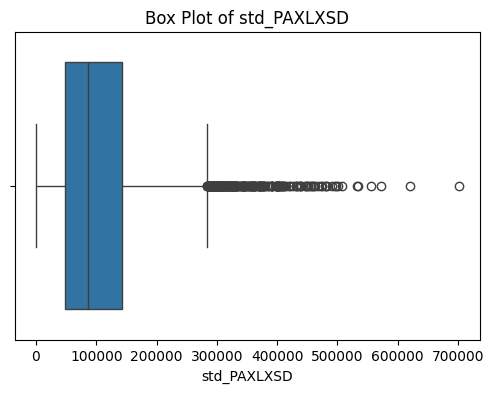

In [ ]:
for col in cols_std:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


# Comparing Objective Activity by Gender

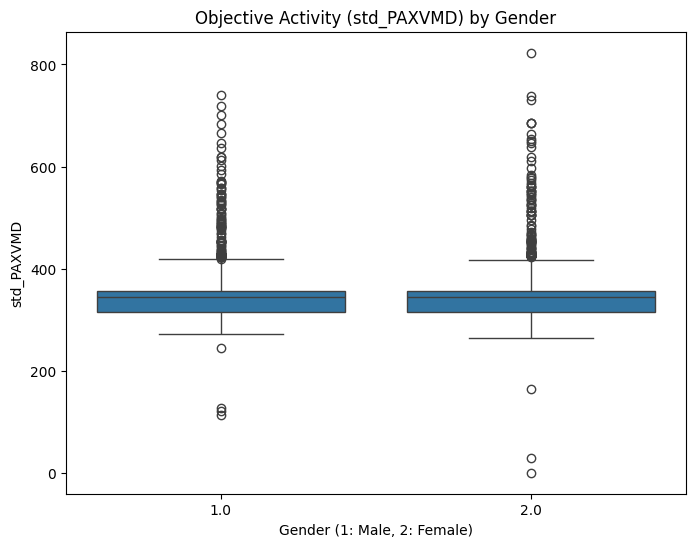

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='RIAGENDR', y='std_PAXVMD', data= data_cleaned)
plt.title('Objective Activity (std_PAXVMD) by Gender')
plt.xlabel('Gender (1: Male, 2: Female)')
plt.ylabel('std_PAXVMD')
plt.show()


# subjective Vigrous Activity Vs Objective Trixial values (Relates to the daily acitivty in the day.)

In [ ]:
data_cleaned['PAQ605'].value_counts()

,count
PAQ605,
2.0,4940
1.0,810
9.0,1


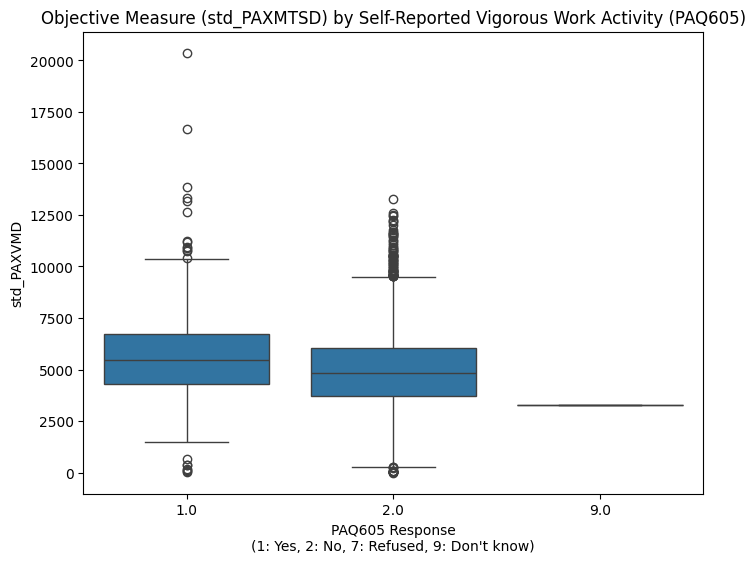

In [ ]:


plt.figure(figsize=(8,6))
sns.boxplot(x='PAQ605', y='std_PAXMTSD', data=data_cleaned)
plt.title('Objective Measure (std_PAXMTSD) by Self-Reported Vigorous Work Activity (PAQ605)')
plt.xlabel('PAQ605 Response\n(1: Yes, 2: No, 7: Refused, 9: Don\'t know)')
plt.ylabel('std_PAXVMD')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='PAQ605', y='std_PAXMTSD', data=data_cleaned, palette="Set2")
plt.title('Distribution of std_PAXMTSD by PAQ605 Response')
plt.xlabel('PAQ605 Response')
plt.ylabel('std_PAXMTSD')
plt.show()


<ipython-input-89-20df431be4d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='PAQ605', y='std_PAXMTSD', data=data_cleaned, palette="Set2")
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='PAQ605', y='std_PAXMTSD', data=data_cleaned, inner=None, palette="pastel")
sns.swarmplot(x='PAQ605', y='std_PAXMTSD', data=data_cleaned, color='k', alpha=0.6)
plt.title('Objective Daily Activity (std_PAXMTSD) by Vigorous Work Activity (PAQ605)')
plt.xlabel('PAQ605 Response\n(1: Yes, 2: No, 7: Refused, 9: Don\'t know)')
plt.ylabel('std_PAXMTSD')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x='PAQ605', y='std_PAXMTSD', data=data_cleaned, jitter=True, palette="Set2")
plt.title('Strip Plot of std_PAXMTSD by PAQ605 Response')
plt.xlabel('PAQ605 Response')
plt.ylabel('std_PAXMTSD')
plt.show()


In [ ]:
data_cleaned['PAD680'].value_counts()

In [ ]:
data_cleaned.loc[:, 'PAD680_hours'] = data_cleaned['PAD680'] / 60


In [ ]:
data_cleaned.head()

In [ ]:
data_cleaned.columns

In [ ]:
data_cleaned.shape

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PAD680_hours', y='std_PAXMTSD', data=data_cleaned)
plt.title('Scatter Plot of Sedentary Time (PAD680) vs. Objective Movement (std_PAXMTSD)')
plt.xlabel('Sedentary Hours (PAD680)')
plt.ylabel('std_PAXMTSD')
plt.show()


In [ ]:
import numpy as np


plt.figure(figsize=(8,6))
sns.scatterplot(x='PAD680_hours', y='std_PAXMTSD', data=data_cleaned)
plt.title('Scatter Plot of Sedentary Time (PAD680_hours) vs. Objective Movement (std_PAXMTSD)')
plt.xlabel('Sedentary Hours (PAD680_hours)')
plt.ylabel('std_PAXMTSD')

# Set x-axis limits to 0 to 24 and ticks at intervals of 4 (0, 4, 8, ..., 24)
plt.xlim(0, 24)
plt.xticks(np.arange(0, 25, 4))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='PAD680', y='std_PAXSWMD', data=data_cleaned)
plt.title('Scatter Plot: Sedentary Minutes vs. Sleep Wear Minutes')
plt.xlabel('Sedentary Hours (PAD680)')
plt.ylabel('Sleep Wear Minutes (PAXSWMH)')


plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='PAD680', y='std_PAXSWMD', data=data_cleaned)
plt.title('Scatter Plot: Sedentary Minutes vs. Sleep Wear Minutes')
plt.xlabel('Sedentary Hours (PAD680)')
plt.ylabel('Sleep Wear Minutes (PAXSWMH)')
plt.xlim(0,1200)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='PAD680_hours', y='std_PAXSWMD',
                     hue='std_PAXMTSD', data=data_cleaned, palette='magma')
plt.title('Sedentary Hours vs. Sleep Wear Minutes\n(Color indicates std_PAXMTSD)')
plt.xlabel('Sedentary Hours (PAD680_hours)')
plt.ylabel('Sleep Wear Minutes (PAXSWMH)')

# Set x-axis limits from 0 to 24
plt.xlim(0, 24)

# Use the mappable from the scatter plot for the colorbar
mappable = ax.collections[0]
plt.colorbar(mappable, label='std_PAXMTSD')

plt.show()

In [ ]:
import pandas as pd

# Read the XPT file (replace 'your_file.xpt' with your actual file path)
health_status = pd.read_sas('/content/HSQ_G.xpt', format='xport')

# Convert the DataFrame to a CSV file (without the index column)
health_status.to_csv('HSQ.csv', index=False)


In [ ]:
health_status = pd.read_csv('/content/HSQ.csv')

In [ ]:
health_status.shape

(8956, 14)

In [ ]:
health_status.head(20)

,SEQN,HSD010,HSQ470,HSQ480,HSQ490,HSQ493,HSQ496,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX
0,62161.0,3.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,NaN,2.0,2.0
1,62162.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0
2,62163.0,3.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e+00,2.0,2.0,2.0,NaN,NaN,NaN,2.0
3,62164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,62165.0,4.0,5.000000e+00,1.500000e+01,5.397605e-79,3.000000e+00,3.000000e+00,1.0,2.0,2.0,NaN,NaN,NaN,2.0
5,62166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,62168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,62169.0,3.0,1.000000e+01,3.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,NaN,2.0,2.0
8,62170.0,2.0,9.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,3.000000e+00,2.0,2.0,2.0,NaN,NaN,NaN,2.0
9,62171.0,3.0,1.000000e+01,2.000000e+01,5.397605e-79,3.000000e+01,1.500000e+01,2.0,2.0,2.0,NaN,NaN,NaN,2.0


In [ ]:
health_status['SEQN'].value_counts()

,count
SEQN,
62161.0,1
68658.0,1
68652.0,1
68653.0,1
68654.0,1
...,...
65414.0,1
65413.0,1
65412.0,1


In [ ]:
health_status.isnull().sum()

,0
SEQN,0
HSD010,3064
HSQ470,3064
HSQ480,3064
HSQ490,3065
HSQ493,3065
HSQ496,3067
HSQ500,819
HSQ510,819
HSQ520,819


In [ ]:
# Get the unique SEQN values from both DataFrames
seqn_cleaned = set(data_cleaned['SEQN'])
seqn_health = set(health_status['SEQN'])

# Find the intersection of both sets
common_seqn = seqn_cleaned.intersection(seqn_health)

# Print the number of matching records
print("Number of matching records:", len(common_seqn))


Number of matching records: 5751


In [ ]:
merged_df = pd.merge(data_cleaned, health_status, on='SEQN', how='inner')


In [ ]:
merged_df.shape

(5751, 34)

In [ ]:
merged_df.isnull().sum()

,0
SEQN,0
std_PAXAISMD,0
std_PAXVMD,0
std_PAXMTSD,0
std_PAXWWMD,0
std_PAXSWMD,0
std_PAXNWMD,0
std_PAXUMD,0
std_PAXLXSD,0
PAQ605,0
